# **Airtel Stock Prediction Models - Daily**

**Model: LSTM**

**Import necessary packages**

In [1]:
import warnings 
warnings.filterwarnings("ignore")

In [2]:
# Basic and Visualization packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

# Ensembling packages
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout

# LSTM packages
from keras.layers import LSTM

In [3]:
# Read csv file
df_stock = pd.read_csv('BHARTIAIRTEL.csv')
df_stock.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,BHARTIARTL,EQ,04-Nov-22,818.65,815.70,821.80,809.20,816.10,816.40,814.59,3768226,3.069542e+09,90470,2243180,59.53
1,BHARTIARTL,BL,03-Nov-22,802.10,809.85,809.85,809.85,809.85,809.85,809.85,3400871,2.754195e+09,1,-,-
2,BHARTIARTL,EQ,03-Nov-22,809.85,809.75,824.40,804.20,817.50,818.65,817.78,5897840,4.823129e+09,160802,3380905,57.32
3,BHARTIARTL,EQ,31-Oct-22,816.85,823.00,833.80,820.00,832.00,832.00,829.27,5487233,4.550408e+09,166517,3411499,62.17
4,BHARTIARTL,EQ,28-Oct-22,817.10,819.00,824.40,811.30,819.50,816.85,816.70,3905093,3.189280e+09,106794,1890500,67.1


**Exploratory Data Analysis (EDA)**

In [4]:
df_stock.shape

(1743, 15)

In [5]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1743 entries, 0 to 1742
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Symbol                  1743 non-null   object 
 1   Series                  1743 non-null   object 
 2   Date                    1743 non-null   object 
 3   Prev Close              1743 non-null   float64
 4   Open Price              1743 non-null   float64
 5   High Price              1743 non-null   float64
 6   Low Price               1743 non-null   float64
 7   Last Price              1743 non-null   float64
 8   Close Price             1743 non-null   float64
 9   Average Price           1743 non-null   float64
 10  Total Traded Quantity   1743 non-null   int64  
 11  Turnover                1743 non-null   float64
 12  No. of Trades           1743 non-null   int64  
 13  Deliverable Qty         1743 non-null   object 
 14  % Dly Qt to Traded Qty  1743 non-null   

Insights: 1. No null values in the dataset. 
2. Need to remove Series values other than 'EQ'
3. Need to remove columns which are not useful for price predictions i.e. remove columns other than 'Date' and 'Close Price'
4. 'Close Price' column to be renamed to 'Close_Price'
5. Date column type to be changed from object to Date 
5. Sort data in ascending order of date
6. Set Date column as new index

In [6]:
# Dropping all Series column values which are not equal to 'EQ'
values=['EQ']
df_stock = df_stock[df_stock['Series'].isin(values)]

In [7]:
df_stock = df_stock[['Date', 'Close Price' ]]

In [8]:
# Renaming of column name 'Close Price'
df_stock = df_stock.rename(columns={'Close Price': 'Close_Price'})
df_stock.head()

,Date,Close_Price
0,04-Nov-22,816.40
2,03-Nov-22,818.65
3,31-Oct-22,832.00
4,28-Oct-22,816.85
5,27-Oct-22,817.10


In [9]:
df_stock.nunique()

Date           1726
Close_Price    1492
dtype: int64

In [10]:
# Find all duplicate rows
df_stock[df_stock.duplicated()]

,Date,Close_Price
756,04-Nov-19,378.00
1498,03-Nov-16,308.95
1500,02-Nov-16,309.60
1502,01-Nov-16,317.45


In [11]:
# Remove duplicate rows
df_stock = df_stock.drop_duplicates()
df_stock.nunique()

Date           1726
Close_Price    1492
dtype: int64

In [12]:
df_stock['Date'] = pd.to_datetime(df_stock['Date'])
df_stock.head()

,Date,Close_Price
0,2022-11-04,816.40
2,2022-11-03,818.65
3,2022-10-31,832.00
4,2022-10-28,816.85
5,2022-10-27,817.10


In [13]:
# Set Date column as index 
df_stock=df_stock.set_index(pd.DatetimeIndex(df_stock['Date']))
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1726 entries, 2022-11-04 to 2015-11-09
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         1726 non-null   datetime64[ns]
 1   Close_Price  1726 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 40.5 KB


In [14]:
# Sort index in ascending order
df_stock = df_stock.sort_index(ascending=True)
df_stock.head()

,Date,Close_Price
Date,,
2015-11-09,2015-11-09,335.25
2015-11-10,2015-11-10,331.65
2015-11-11,2015-11-11,331.90
2015-11-13,2015-11-13,333.90
2015-11-16,2015-11-16,335.75


In [15]:
# Providing data range for understanding
print(f'Dataframe contains stock prices between {df_stock.Date.min().strftime("%Y-%m-%d")} and {df_stock.Date.max().strftime("%Y-%m-%d")}')
print(f'Total days {(df_stock.Date.max() - df_stock.Date.min()).days} days')

Dataframe contains stock prices between 2015-11-09 and 2022-11-04
Total days 2552 days


In [16]:
df_stock['Date']= pd.to_datetime(df_stock["Date"]).dt.strftime("%Y%m%d")
df_stock.head()

,Date,Close_Price
Date,,
2015-11-09,20151109,335.25
2015-11-10,20151110,331.65
2015-11-11,20151111,331.90
2015-11-13,20151113,333.90
2015-11-16,20151116,335.75


In [17]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1726 entries, 2015-11-09 to 2022-11-04
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1726 non-null   object 
 1   Close_Price  1726 non-null   float64
dtypes: float64(1), object(1)
memory usage: 40.5+ KB


In [18]:
# Convert Date column to integer
df_stock['Date'] = df_stock['Date'].astype('int64')

In [19]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1726 entries, 2015-11-09 to 2022-11-04
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1726 non-null   int64  
 1   Close_Price  1726 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 40.5 KB


**Finding Outliers and Treatment**

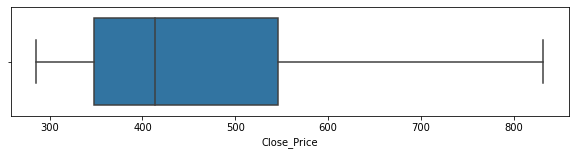

In [20]:
# Boxplot
plt.figure(figsize=(10,2))
ax = sns.boxplot(x=df_stock['Close_Price'],whis=1.5,data=df_stock)

Insight: No outliers in the dataset

**Data Visualizations**

**Histogram**

<Figure size 576x288 with 0 Axes>

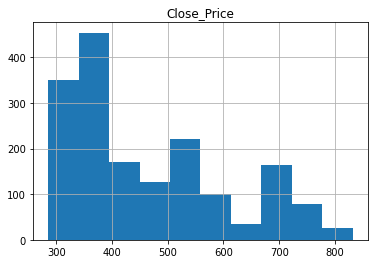

In [21]:
plt.figure(figsize=(8,4))
df_stock.hist("Close_Price")
plt.show()

**Density Plot**

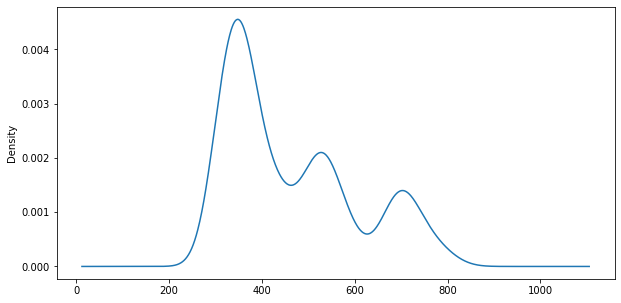

In [22]:
plt.figure(figsize=(10,5))
df_stock["Close_Price"].plot(kind='kde')
plt.show()

**Scatter Plot**

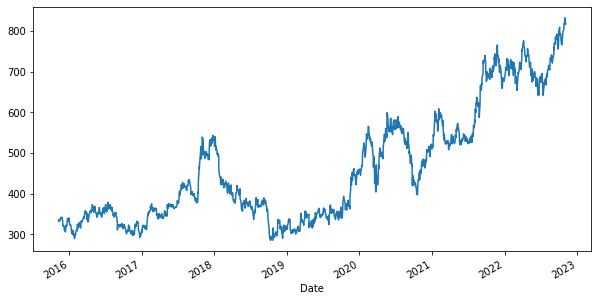

In [23]:
plt.figure(figsize=(10,5))
df_stock['Close_Price'].plot()
plt.show()

Insight: Trend is upword or positive. Seasonality can be observed slightly.

**Correlation between variables**

In [24]:
df_stock.corr()

,Date,Close_Price
Date,1.000000,0.830831
Close_Price,0.830831,1.000000


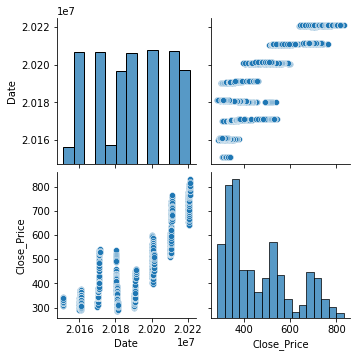

In [25]:
sns.pairplot(df_stock)

Final Conclusion: Have significant relationship exists between Data and Close_Price

**Analysis and Splitting of Data into Train and Test**

In [26]:
df_stock.tail(19)

,Date,Close_Price
Date,,
2022-10-06,20221006,788.60
2022-10-07,20221007,793.10
2022-10-10,20221010,792.35
2022-10-11,20221011,780.30
2022-10-12,20221012,775.55
2022-10-13,20221013,768.90
2022-10-14,20221014,765.95
2022-10-17,20221017,766.00
2022-10-18,20221018,783.15


In [27]:
# So, we can use one month data for predicting/forecasting.
n=19
df_stock_train = df_stock.iloc[0:(len(df_stock)-n), :]
df_stock_test = df_stock.iloc[(len(df_stock)-n):, :]

# Create separate train dataset for Arima use since we append data while forecasting
df_stock_train_arima = df_stock.iloc[0:(len(df_stock)-n), :]

In [28]:
print(df_stock_train.info())
print(df_stock_train_arima.info())
print(df_stock_test.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1707 entries, 2015-11-09 to 2022-10-04
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1707 non-null   int64  
 1   Close_Price  1707 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 40.0 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1707 entries, 2015-11-09 to 2022-10-04
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1707 non-null   int64  
 1   Close_Price  1707 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 40.0 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19 entries, 2022-10-06 to 2022-11-04
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         19 non-null     int64  
 1   Close_Price  19 non-null     float64
dtypes: float6

In [29]:
df_stock_train.tail()

,Date,Close_Price
Date,,
2022-09-28,20220928,761.45
2022-09-29,20220929,764.65
2022-09-30,20220930,799.90
2022-10-03,20221003,803.35
2022-10-04,20221004,808.70


In [30]:
df_stock_test.head()

,Date,Close_Price
Date,,
2022-10-06,20221006,788.60
2022-10-07,20221007,793.10
2022-10-10,20221010,792.35
2022-10-11,20221011,780.30
2022-10-12,20221012,775.55


In [31]:
df_stock_train_x = df_stock_train['Date']
df_stock_train_y = df_stock_train['Close_Price']

df_stock_train_array_x = df_stock_train_x.values.reshape(-1,1)
df_stock_train_array_y = df_stock_train_y.values.reshape(-1,1)

Don't delete below

## **LSTM (Long Short Term Memory)**

In [32]:
print(df_stock_train_y.head())
print(df_stock_train_y.shape)

Date
2015-11-09    335.25
2015-11-10    331.65
2015-11-11    331.90
2015-11-13    333.90
2015-11-16    335.75
Name: Close_Price, dtype: float64
(1707,)


**Create LSTM model using training data**

In [33]:
# Create LSTM Dataframes from train data
lookback=10
x_train = []
y_train = []
for i in range(lookback,len(df_stock_train_array_y)):
  x_train.append(df_stock_train_array_y[i-lookback:i, 0])
  y_train.append(df_stock_train_array_y[i,0])

x_train = np.array(x_train)
y_train = np.array(y_train)
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)

x_train shape:  (1697, 10)
y_train shape:  (1697,)


In [34]:
# Reshape the data to suit LSTM
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1], 1 ) )
print('x_train new shape: ', x_train.shape)

x_train new shape:  (1697, 10, 1)


In [35]:
# Create LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(32, input_shape=(x_train.shape[1],1), activation='relu'))
lstm_model.add(Dense(1, activation='linear'))

In [36]:
# compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

In [37]:
# fit the model
hist = lstm_model.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
54/54 [==============================] - 2s 6ms/step - loss: 134935.1406
Epoch 2/100
54/54 [==============================] - 0s 6ms/step - loss: 2430.8828
Epoch 3/100
54/54 [==============================] - 0s 6ms/step - loss: 1748.9104
Epoch 4/100
54/54 [==============================] - 0s 5ms/step - loss: 1760.4116
Epoch 5/100
54/54 [==============================] - 0s 5ms/step - loss: 598.9343
Epoch 6/100
54/54 [==============================] - 0s 6ms/step - loss: 528.6158
Epoch 7/100
54/54 [==============================] - 0s 5ms/step - loss: 490.1224
Epoch 8/100
54/54 [==============================] - 0s 5ms/step - loss: 482.0311
Epoch 9/100
54/54 [==============================] - 0s 5ms/step - loss: 618.1428
Epoch 10/100
54/54 [==============================] - 0s 6ms/step - loss: 514.8073
Epoch 11/100
54/54 [==============================] - 0s 6ms/step - loss: 445.3169
Epoch 12/100
54/54 [==============================] - 0s 6ms/step - loss: 486.9118
Epoch 1

**Predict for test data using above created model**

Note: Instead of appending test data to training dataset, used original dataset which contains both training and test data i.e. whole data before splitting

In [38]:
# Now we will predict for entire dataset which includes our test data also
df_stock_close = df_stock['Close_Price']
df_stock_close_array = df_stock_close.values.reshape(-1,1)
close_total = []

for i in range(lookback,len(df_stock_close_array)):
  close_total.append(df_stock_close_array[i-lookback:i, 0])

close_total = np.array(close_total)

print('close_total shape: ', close_total.shape)

close_total shape:  (1716, 10)


In [39]:
close_total = np.reshape(close_total,(close_total.shape[0], close_total.shape[1], 1 ))
print('close_total new shape: ', close_total.shape)

close_total new shape:  (1716, 10, 1)


In [40]:
pred_lstm = lstm_model.predict(close_total)

54/54 [==============================] - 0s 2ms/step


In [41]:
# Get prediction of last 19 rows which is last one month
df_pred_lstm = pd.DataFrame(pred_lstm, columns=['Pred_Price'])
df_pred_lstm_19 = df_pred_lstm.tail(19)
df_pred_lstm_19

,Pred_Price
1697,808.883362
1698,806.319153
1699,803.420715
1700,795.131958
1701,794.570801
1702,788.895630
1703,779.326172
1704,774.131470
1705,770.196716
1706,773.416321


In [42]:
df_stock_close_19  = df_stock['Close_Price'].tail(19)
df_stock_close_19

Date
2022-10-06    788.60
2022-10-07    793.10
2022-10-10    792.35
2022-10-11    780.30
2022-10-12    775.55
2022-10-13    768.90
2022-10-14    765.95
2022-10-17    766.00
2022-10-18    783.15
2022-10-19    783.40
2022-10-20    792.90
2022-10-21    797.45
2022-10-24    802.10
2022-10-25    802.30
2022-10-27    817.10
2022-10-28    816.85
2022-10-31    832.00
2022-11-03    818.65
2022-11-04    816.40
Name: Close_Price, dtype: float64

In [43]:
df_stock_date_19  = df_stock['Date'].tail(19)
df_stock_date_19

Date
2022-10-06    20221006
2022-10-07    20221007
2022-10-10    20221010
2022-10-11    20221011
2022-10-12    20221012
2022-10-13    20221013
2022-10-14    20221014
2022-10-17    20221017
2022-10-18    20221018
2022-10-19    20221019
2022-10-20    20221020
2022-10-21    20221021
2022-10-24    20221024
2022-10-25    20221025
2022-10-27    20221027
2022-10-28    20221028
2022-10-31    20221031
2022-11-03    20221103
2022-11-04    20221104
Name: Date, dtype: int64

**Evaluation of LSTM Model**

In [44]:
mse = mean_squared_error(df_stock_close_19, df_pred_lstm_19)
rmse = mse**.5
print(mse)
print(rmse)

164.67240267084625
12.832474534198237


**Understanding the predictions by charts (LSTM)**


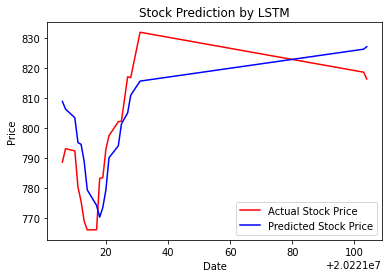

In [45]:
plt.plot(df_stock_date_19, df_stock_close_19, color='red', label='Actual Stock Price')
plt.plot(df_stock_date_19, df_pred_lstm_19['Pred_Price'], color='blue', label='Predicted Stock Price')
plt.title('Stock Prediction by LSTM')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [46]:
# Loss history after every epoch execution
hist_dict = hist.history
hist_dict

{'loss': [134935.140625,
  2430.8828125,
  1748.910400390625,
  1760.41162109375,
  598.934326171875,
  528.6157836914062,
  490.12237548828125,
  482.0311279296875,
  618.1427612304688,
  514.8073120117188,
  445.3169250488281,
  486.91180419921875,
  467.0562744140625,
  589.881103515625,
  457.92449951171875,
  394.83526611328125,
  362.62017822265625,
  335.9667053222656,
  321.4549255371094,
  295.56451416015625,
  281.3796691894531,
  286.09637451171875,
  261.1488037109375,
  250.8930206298828,
  234.78131103515625,
  247.791015625,
  267.2477722167969,
  221.8438720703125,
  222.1513214111328,
  219.29458618164062,
  206.77655029296875,
  196.001220703125,
  219.806884765625,
  190.1934051513672,
  225.46694946289062,
  184.24673461914062,
  190.9416961669922,
  177.07235717773438,
  192.51966857910156,
  193.434326171875,
  174.58523559570312,
  176.98208618164062,
  174.42137145996094,
  182.59255981445312,
  174.7230224609375,
  201.086181640625,
  184.47647094726562,
  172.

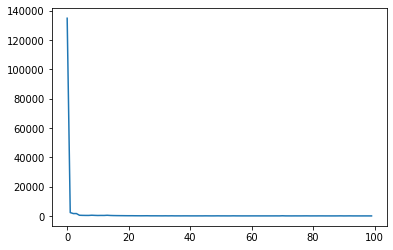

In [47]:
# LSTM model training loss for visualization
plt.plot(pd.DataFrame(hist.history))

# Final Conclusion

Final Conclusion: By looking at RMSE and predicted values, LSTM is one of the best model since predictions are near to actual values and prediction values are varying as actual values varies.